# Ergodic True Strength Index

https://www.motivewave.com/studies/ergodic_true_strength_index.htm

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-01-01'
end = '2022-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.888069,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.880939,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.070839,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.538448,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.384159,82271200


In [3]:
# Calculate TSI
def TSI(data, r=25, s=13):
    close = data['Adj Close']
    pc = close.pct_change().fillna(0)
    double_smooth = lambda x, w: x.ewm(span=w).mean().ewm(span=w).mean()
    EMA_r = double_smooth(pc, r)
    EMA_s = double_smooth(EMA_r, s)
    abs_EMA_r = double_smooth(pc.abs(), r)
    abs_EMA_s = double_smooth(abs_EMA_r, s)
    TSI = 100 * EMA_s / abs_EMA_s
    return TSI

df['ERG_TS'] = TSI(df)



In [4]:
df = df.dropna()
df = df.iloc[1:, :] # Drop the first Row
df.head()

,Open,High,Low,Close,Adj Close,Volume,ERG_TS
Date,,,,,,,
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.070839,89738400,60.620754
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.538448,94640000,81.730859
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.384159,82271200,82.731656
2018-01-09,43.637501,43.764999,43.352501,43.582500,41.379410,86336000,81.031177
2018-01-10,43.290001,43.575001,43.250000,43.572498,41.369923,95839600,79.015651


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,ERG_TS
Date,,,,,,,
2021-12-27,177.089996,180.419998,177.070007,180.330002,179.016113,74919600,31.194497
2021-12-28,180.160004,181.330002,178.529999,179.289993,177.983688,79144300,31.357959
2021-12-29,179.330002,180.630005,178.139999,179.380005,178.073044,62348900,31.467469
2021-12-30,179.470001,180.570007,178.089996,178.199997,176.901627,59773000,31.528337
2021-12-31,178.089996,179.229996,177.259995,177.570007,176.276230,64062300,31.542376


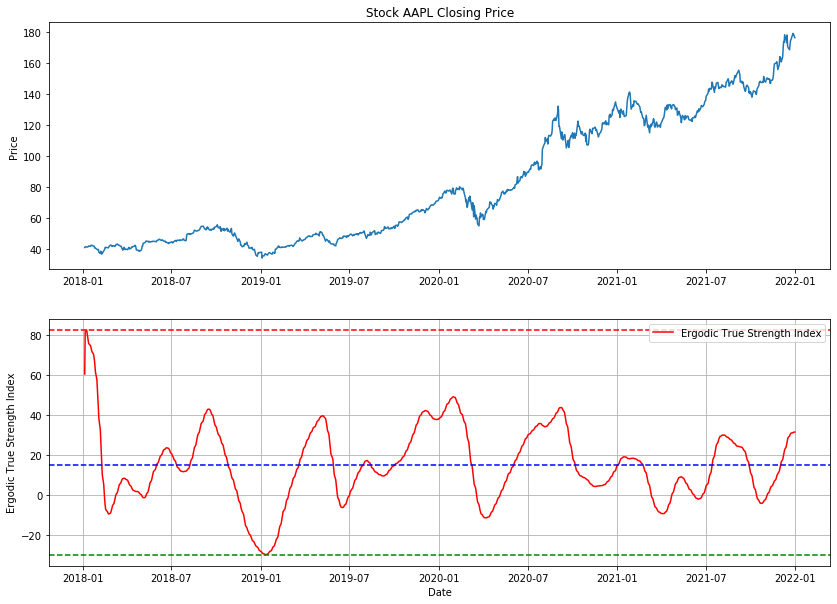

In [6]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['ERG_TS'], label='Ergodic True Strength Index', color='red')
ax2.axhline(y=df['ERG_TS'].mean(), color='blue', linestyle='--')
ax2.axhline(y=df['ERG_TS'].min(), color='green', linestyle='--')
ax2.axhline(y=df['ERG_TS'].max(), color='red', linestyle='--')
ax2.grid()
ax2.set_ylabel('Ergodic True Strength Index')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

Text(0.5, 0, 'Date')

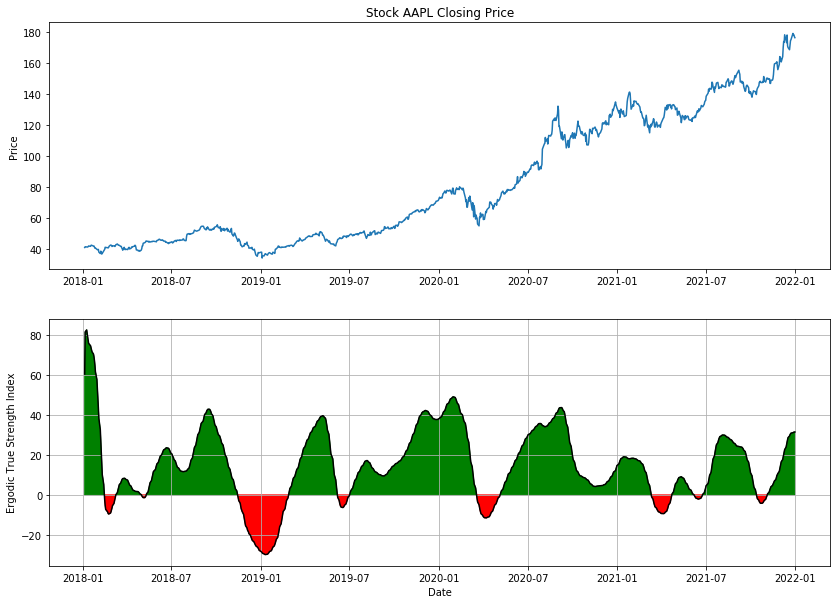

In [7]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['ERG_TS'], label='Ergodic True Strength Index', color='k')
ax2.fill_between(df.index, y1=df['ERG_TS'], y2=0, where=df['ERG_TS']>0, color='green')
ax2.fill_between(df.index, y1=df['ERG_TS'], y2=0, where=df['ERG_TS']<0, color='red')
ax2.grid()
ax2.set_ylabel('Ergodic True Strength Index')
ax2.set_xlabel('Date')

## Candlestick with Ergodic True Strength Index

In [8]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ERG_TS,VolumePositive
0,736698.0,43.134998,43.367500,43.020000,43.257500,41.070839,89738400,60.620754,False
1,736699.0,43.360001,43.842499,43.262501,43.750000,41.538448,94640000,81.730859,False
2,736702.0,43.587502,43.902500,43.482498,43.587502,41.384159,82271200,82.731656,False
3,736703.0,43.637501,43.764999,43.352501,43.582500,41.379410,86336000,81.031177,False
4,736704.0,43.290001,43.575001,43.250000,43.572498,41.369923,95839600,79.015651,False


Text(0.5, 0, 'Date')

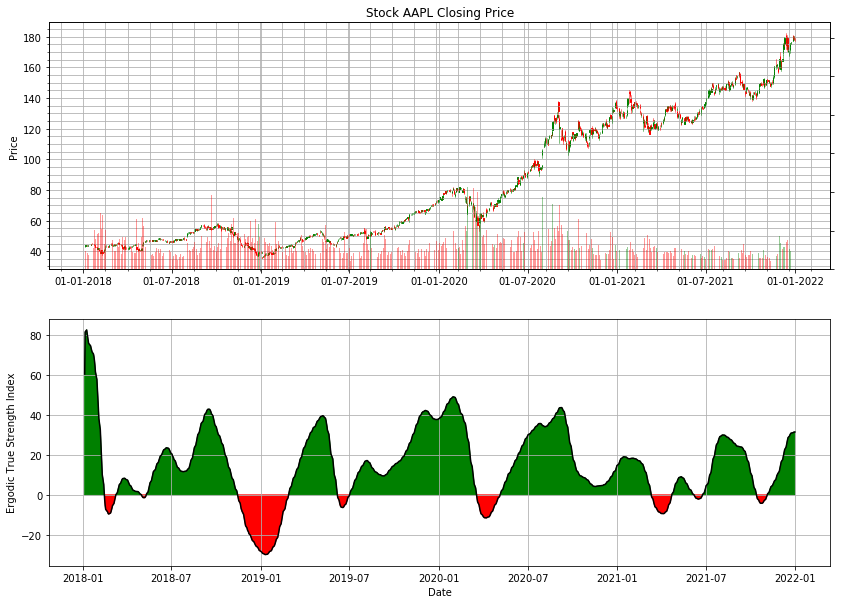

In [9]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['ERG_TS'], label='Ergodic True Strength Index', color='k')
ax2.fill_between(df.index, y1=df['ERG_TS'], y2=0, where=df['ERG_TS']>0, color='green')
ax2.fill_between(df.index, y1=df['ERG_TS'], y2=0, where=df['ERG_TS']<0, color='red')
ax2.grid()
ax2.set_ylabel('Ergodic True Strength Index')
ax2.set_xlabel('Date')